In [ ]:
pip install cvxopt


In [ ]:
pip install numpy


In [ ]:
pip install scipy

1. Квадратичное программирование и QP-солвер

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

2)


In [ ]:
import numpy as np
from cvxopt import matrix, solvers

# Определяем коэффициенты для квадратичной функции
Q = np.array([[2.0, 0.0],
              [0.0, 8.0]])  # Коэффициенты для x1^2 и x2^2
p = np.array([-8.0, -16.0])  # Коэффициенты для линейной части

# Преобразуем в формат cvxopt
Q = matrix(Q)
p = matrix(p)

# Ограничения
G = np.array([[-1.0, -1.0],  # x1 + x2 <= 5
              [1.0, 0.0],   # x1 >= 0
              [0.0, 1.0],   # x2 >= 0
              [1.0, 0.0]])  # x1 <= 3

h = np.array([5.0, 0.0, 0.0, 3.0])  # Правая часть ограничений

# Преобразуем в формат cvxopt
G = matrix(G)
h = matrix(h)

# Решаем задачу
sol = solvers.qp(Q, p, G, h)

# Выводим результаты
x1, x2 = sol['x'][0], sol['x'][1]  # Извлекаем значения переменных
print(f"Оптимальное значение: {sol['primal objective']}")
print(f"Оптимальные значения переменных: x1 = {x1}, x2 = {x2}")



     pcost       dcost       gap    pres   dres
 0: -1.9000e+01 -2.0000e+01  5e+01  7e-01  4e-01
 1: -2.4303e+00 -4.4403e+00  6e+00  5e-02  3e-02
 2: -2.9209e-02 -6.0865e-02  7e-02  6e-04  4e-04
 3: -2.9219e-04 -6.0862e-04  7e-04  6e-06  4e-06
 4: -2.9219e-06 -6.0862e-06  7e-06  6e-08  4e-08
 5: -2.9219e-08 -6.0862e-08  7e-08  6e-10  4e-10
Optimal solution found.
Оптимальное значение: -2.9219358130949024e-08
Оптимальные значения переменных: x1 = 5.870261118815568e-10, x2 = 1.5326968278523629e-09


3) Чтобы определить, какие ограничения являются активными, а какие неактивными в данной задаче, нужно сначала найти точку оптимума функции:


    f(x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2


при ограничениях:

1. x_1 + x_2 ≤ 5
2. 0 ≤ x_1 ≤ 3
3. x_2 ≥ 0

Нахождение точки оптимума

Для нахождения точки оптимума нужно найти частные производные функции f по переменным x_1 и x_2 и приравнять их к нулю.


    ∂ f/∂ x_1 = -8 + 2x_1 = 0  x_1 = 4



    ∂ f/∂ x_2 = -16 + 8x_2 = 0  x_2 = 2


Проверка ограничений

Теперь подставим найденные значения x_1 = 4 и x_2 = 2 в ограничения:

1. x_1 + x_2 = 4 + 2 = 6 ≤ 5 (не выполняется)
2. 0 ≤ x_1 = 4 ≤ 3 (не выполняется)
3. x_2 = 2 ≥ 0 (выполняется)

Так как найденные значения не удовлетворяют ограничениям, необходимо проверить границы.

Проверка границ

Проверим границы ограничения 0 ≤ x_1 ≤ 3:

- Если x_1 = 3, подставим в первое ограничение:
  
  
    x_2 = 5 - x_1 = 5 - 3 = 2


- Проверим, удовлетворяет ли это значение ограничения:


    x_1 + x_2 = 3 + 2 = 5    (выполняется)


Таким образом, точка (3, 2) удовлетворяет всем ограничениям.

Определение активных и неактивных ограничений

Теперь проанализируем ограничения:

1. x_1 + x_2 ≤ 5: В точке (3, 2) выполняется как равенство, значит, активное.
2. 0 ≤ x_1 ≤ 3: В точке (3, 2) также выполняется как равенство для верхней границы, значит, активное.
3. x_2 ≥ 0: В точке (3, 2) выполняется с запасом, значит, неактивное.

Вывод

- Активные ограничения: x_1 + x_2 ≤ 5 и 0 ≤ x_1 ≤ 3
- Неактивное ограничение: x_2 ≥ 0

Таким образом, можно выбросить ограничение x_2 ≥ 0 без изменения точки оптимума.

2. Линейный SVM

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

1)

Weights: [-0.41673542 -1.06455372]
Bias: -0.4569846027879789


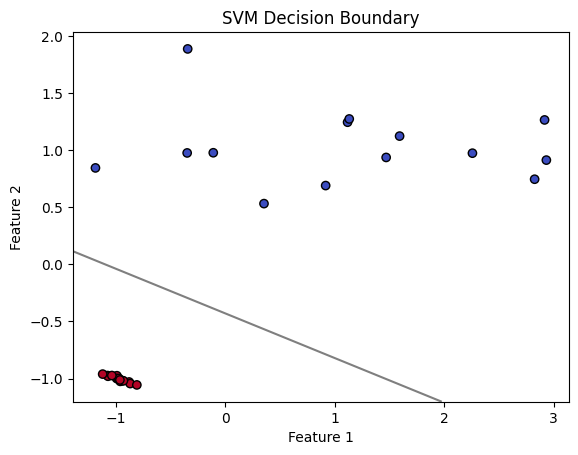

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Создание искусственного набора данных
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
y[y == 0] = -1  # Приводим метки к {-1, 1}

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели SVM с линейным ядром
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Получение весов и смещения
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

print("Weights:", w)
print("Bias:", b)

# Визуализация результатов
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Создаем сетку для визуализации
    xlim = plt.xlim()
    ylim = plt.ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Предсказание на сетке
    Z = model.decision_function(xy).reshape(XX.shape)

    # Визуализация границы принятия решения
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)

plot_decision_boundary(X_test, y_test, svm_model)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



2)

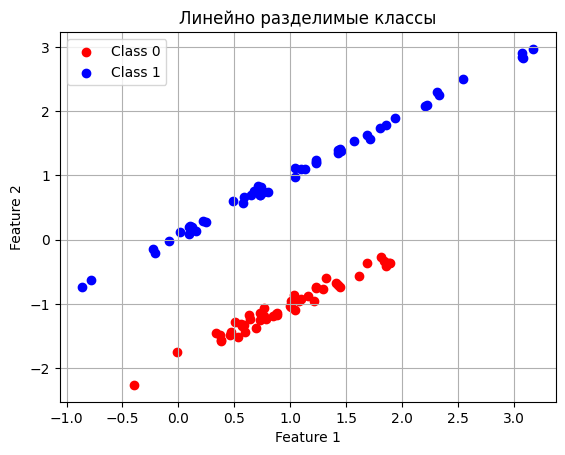

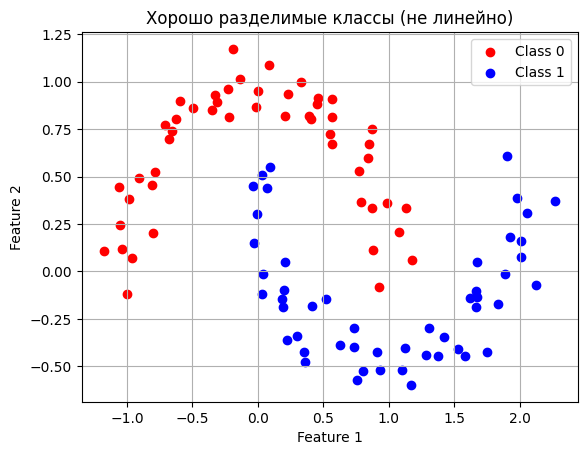

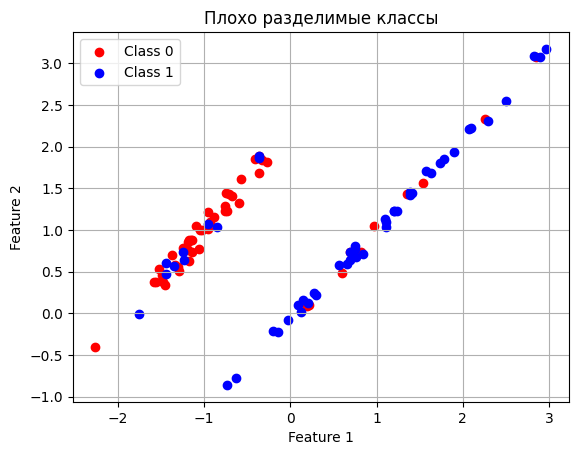

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Функция для визуализации выборок
def plot_samples(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# 1. Линейно разделимые классы
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2,
                                         n_redundant=0, n_clusters_per_class=1,
                                         random_state=42)

plot_samples(X_linear, y_linear, 'Линейно разделимые классы')

# 2. Хорошо разделимые классы, но не линейно (например, полумесяцы)
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.1, random_state=42)

plot_samples(X_nonlinear, y_nonlinear, 'Хорошо разделимые классы (не линейно)')

# 3. Плохо разделимые классы
X_overlap, y_overlap = make_classification(n_samples=100, n_features=2, n_informative=2,
                                           n_redundant=0, n_clusters_per_class=1,
                                           flip_y=0.3, random_state=42)

plot_samples(X_overlap, y_overlap, 'Плохо разделимые классы')


3)

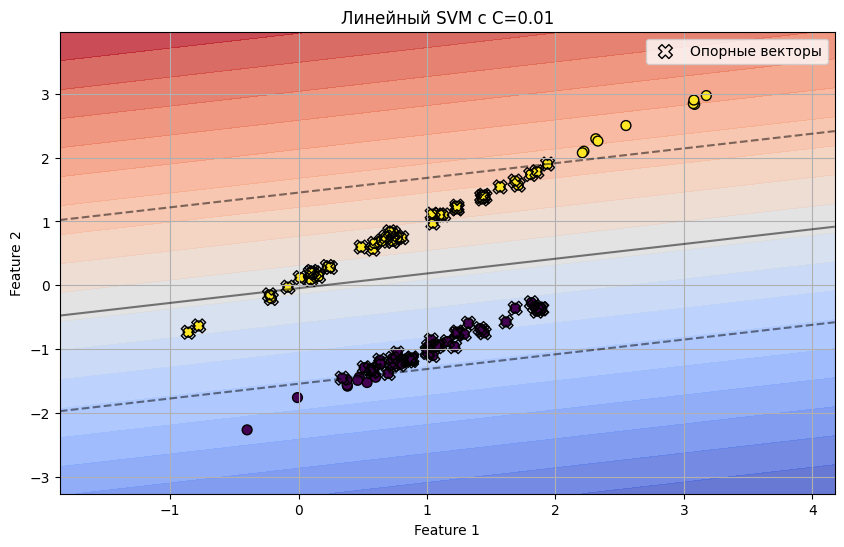

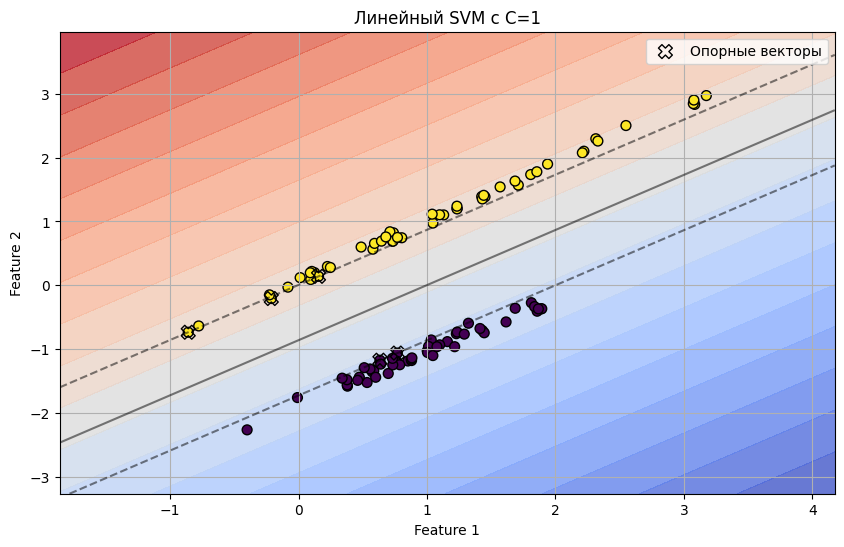

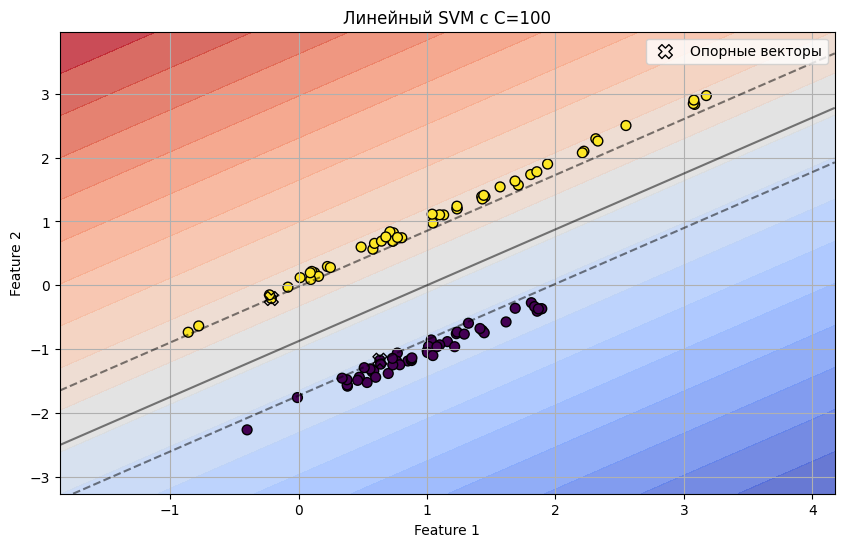

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Генерация линейно разделимых классов
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Функция для визуализации SVM
def plot_svm(X, y, C):
    # Обучение SVM
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Создание сетки для предсказаний
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)

    # Отображение опорных векторов
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', marker='X', label='Опорные векторы')

    # Линии уровня для f(x) = ±1
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.title(f'Линейный SVM с C={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Тестирование с различными значениями параметра C
C_values = [0.01, 1, 100]
for C in C_values:
    plot_svm(X, y, C)


4)

1. Влияние параметра \\( C \\):

- Низкие значения \\( C \\):
  - Модель допускает больше ошибок на обучающей выборке, что приводит к более "мягкому" разделению классов.
  - В результате, может быть больше опорных векторов, так как SVM будет "прощать" некоторые ошибки и использовать больше точек данных для определения границы решения.

- Высокие значения \\( C \\):
  - Модель стремится минимизировать ошибки на обучающей выборке, что приводит к более "жесткому" разделению классов.
  - В этом случае количество опорных векторов может уменьшиться, так как модель будет пытаться максимально точно разделить классы, игнорируя точки, которые находятся далеко от границы.

2. Особенности выборки:

- Линейно разделимые данные:
  - Если данные идеально линейно разделимы, то с увеличением \\( C \\) число опорных векторов может уменьшаться, поскольку модель может найти четкую границу без необходимости учитывать дополнительные точки.

- Шумные или пересекающиеся данные:
  - Если выборка содержит шум или классы пересекаются, то даже при высоких значениях \\( C \\) число опорных векторов может оставаться высоким, так как модель будет вынуждена учитывать много точек для формирования границы.

3. Визуализация зависимости:



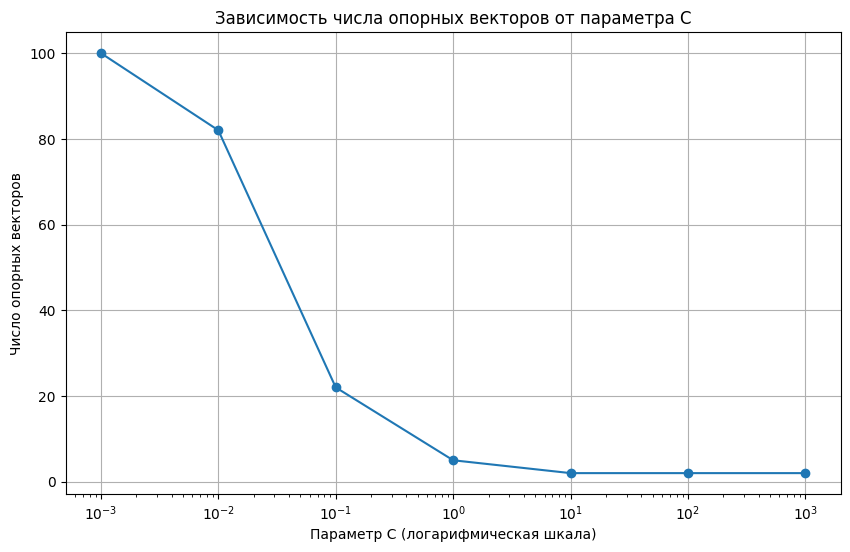

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Значения C для тестирования
C_values = np.logspace(-3, 3, 7)
support_vectors_count = []

# Обучение SVM и подсчет опорных векторов
for C in C_values:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X, y)
    support_vectors_count.append(len(clf.support_vectors_))

# Визуализация зависимости
plt.figure(figsize=(10, 6))
plt.plot(C_values, support_vectors_count, marker='o')
plt.xscale('log')
plt.xlabel('Параметр C (логарифмическая шкала)')
plt.ylabel('Число опорных векторов')
plt.title('Зависимость числа опорных векторов от параметра C')
plt.grid(True)
plt.show()


5)

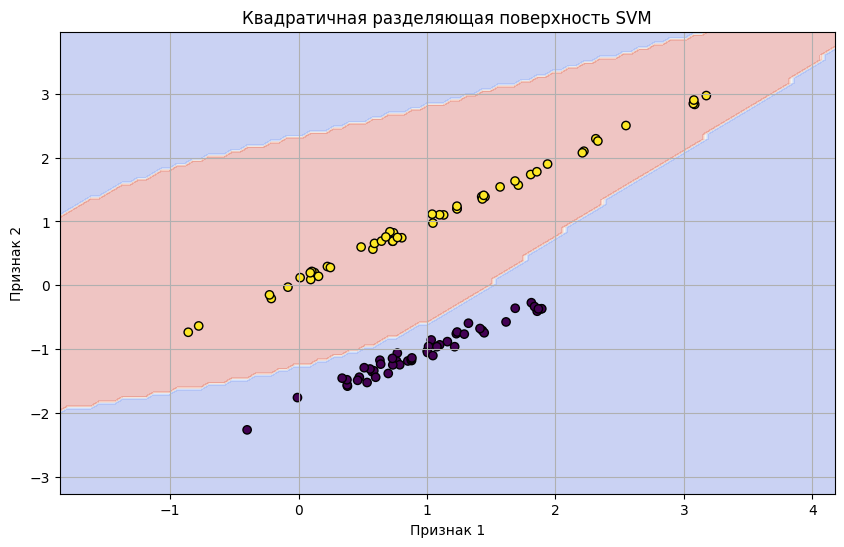

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Преобразование признаков в полиномиальные
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Обучение модели SVM с полиномиальным ядром
clf = svm.SVC(kernel='poly', degree=2, C=1)
clf.fit(X_poly, y)

# Создание сетки для визуализации
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Визуализация данных и разделяющей поверхности
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Квадратичная разделяющая поверхность SVM')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()


3. Двойственный переход и Ядровой SVM

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

1)

     pcost       dcost       gap    pres   dres
 0: -6.1535e+01 -2.2603e+02  9e+02  2e+00  3e-15
 1: -3.8296e+01 -1.3827e+02  1e+02  3e-02  2e-15
 2: -3.7901e+01 -3.9814e+01  2e+00  5e-04  1e-15
 3: -3.7999e+01 -3.8018e+01  2e-02  5e-06  2e-15
 4: -3.8000e+01 -3.8000e+01  2e-04  5e-08  2e-15
 5: -3.8000e+01 -3.8000e+01  2e-06  5e-10  1e-15
Optimal solution found.


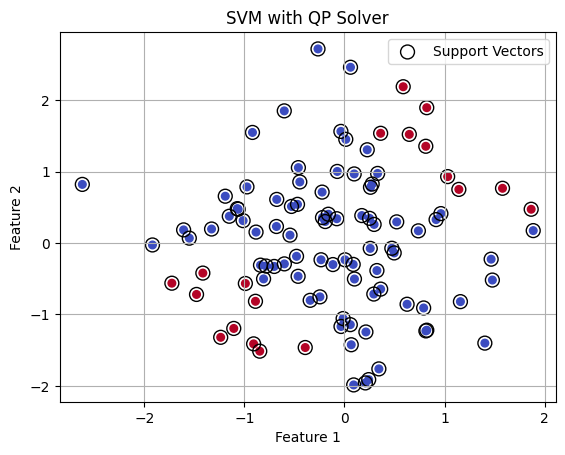

Support Vectors: [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763 ]
 [ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-1.15099358  0.37569802]
 [-0.60063869 -0.29169375]
 [-0.60170661  1.85227818]
 [-0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012]
 [-1.32818605  0.19686124]
 [ 0.73846658  0.17136828]
 [-0.11564828 -0.3011037 ]
 [-1.47852199 -0.71984421]
 [-0.46063877  1.05712223]
 [ 0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228]
 [-0.676922    0.61167629]
 [ 1.03099952  0.93128012]
 [-0.83921752 -0.30921238]
 [ 0.33126343  0.97554513]
 [-0.47917424 -0.18565898]
 [-1.10633497 -1.19620662]
 [ 0.81252582  1.35624003]
 [-0.07201012  1.0035329 ]
 [ 0.36163603 -0.64511975]
 [ 0.36139561  1.53803657]
 [-0.035826

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Генерация данных
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.sign(X[:, 0] * X[:, 1] - 0.5)  # Разделяющая поверхность

# Преобразование меток
y[y == 0] = -1  # Преобразуем метки 0 в -1

# Параметры SVM
C = 1.0  # Параметр регуляризации

# Формулирование задачи QP
m, n = X.shape
K = np.dot(X, X.T) * np.outer(y, y)  # Ядро (линейное)

# Формирование матриц для QP
P = matrix(K)
q = matrix(-np.ones(m))
G = matrix(np.vstack((-np.eye(m), np.eye(m))))
h = matrix(np.hstack((np.zeros(m), C * np.ones(m))))
A = matrix(y, (1, m))
b = matrix(0.0)

# Решение QP
sol = solvers.qp(P, q, G, h, A, b)

# Получение альфа
alpha = np.array(sol['x']).flatten()

# Находим поддерживающие векторы
support_indices = np.where(alpha > 1e-5)[0]
support_vectors = X[support_indices]
support_vector_labels = y[support_indices]
support_vector_alphas = alpha[support_indices]

# Вычисление смещения b
b = np.mean(support_vector_labels - np.dot(support_vectors, np.dot(X.T, support_vector_alphas * support_vector_labels)))

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title('SVM with QP Solver')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

print("Support Vectors:", support_vectors)
print("Bias (b):", b)


2)

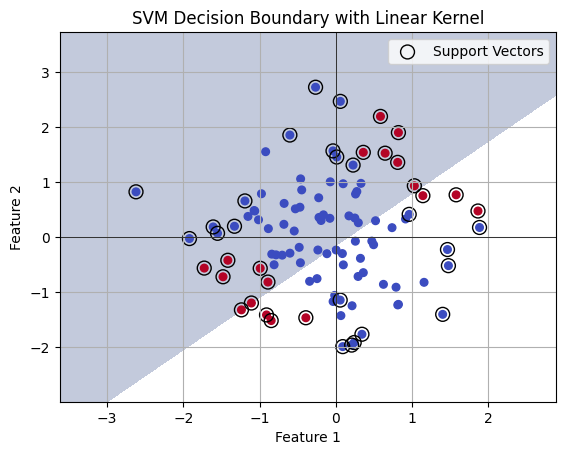

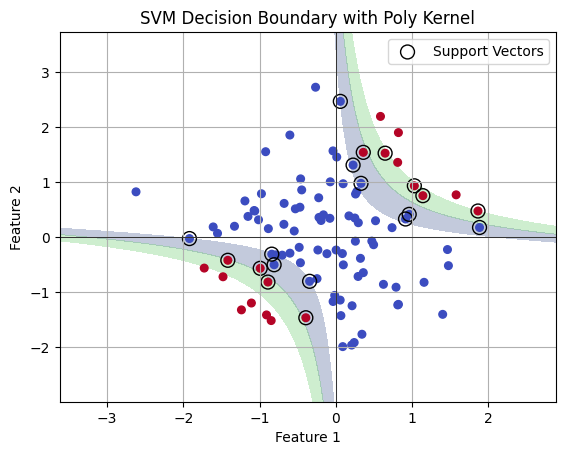

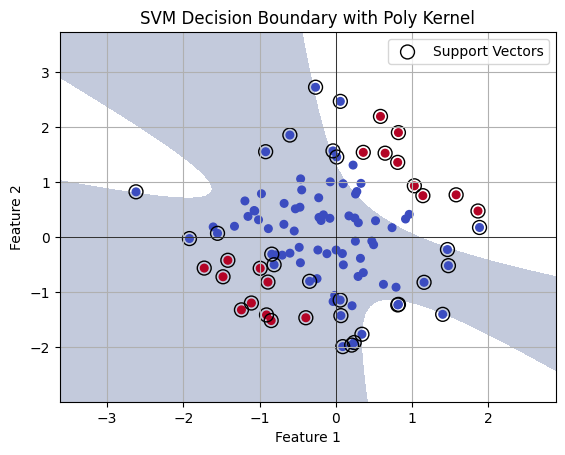

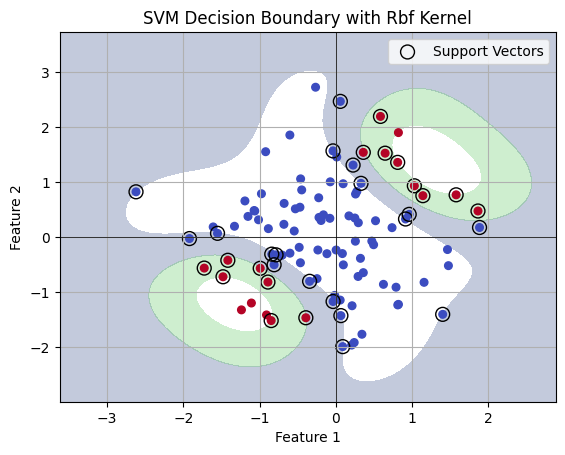

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Генерация случайных данных
def generate_data(n_samples=100):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = np.sign(X[:, 0] * X[:, 1] - 0.5)  # Разделяющая поверхность
    return X, y

# Визуализация
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(f'SVM Decision Boundary with {clf.kernel.capitalize()} Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.grid()
    plt.show()

# Основной код
X, y = generate_data(n_samples=100)

# Линейное ядро
clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(X, y)
plot_decision_boundary(clf_linear, X, y)

# Полиномиальное ядро (степень 2)
clf_poly2 = SVC(kernel='poly', degree=2, C=1.0)
clf_poly2.fit(X, y)
plot_decision_boundary(clf_poly2, X, y)

# Полиномиальное ядро (степень 3)
clf_poly3 = SVC(kernel='poly', degree=3, C=1.0)
clf_poly3.fit(X, y)
plot_decision_boundary(clf_poly3, X, y)

# Гауссовское RBF ядро
clf_rbf = SVC(kernel='rbf', gamma=1.0, C=1.0)
clf_rbf.fit(X, y)
plot_decision_boundary(clf_rbf, X, y)


3)

Параметр C:

- Низкие значения C:
  - Модель будет менее чувствительной к ошибкам на обучающей выборке. Это может привести к более гладкой границе решения, что способствует переобучению.
  - Модель может игнорировать некоторые выбросы и шум в данных.

- Высокие значения C:
  - Модель будет более чувствительной к ошибкам на обучающей выборке. Это может привести к более сложной границе решения, которая может лучше подстраиваться под данные.
  - Может возникнуть переобучение, если модель слишком сильно подстраивается под шум в данных.

Степень полинома p:

- Низкие значения p (например, 1 или 2):
  - Модель будет более простой, что может привести к недостаточному представлению сложных зависимостей в данных.
  - Линейное или квадратичное разделение может быть недостаточным для сложных задач.

- Высокие значения p (например, 3 и выше):
  - Модель станет более гибкой и сможет лучше подстраиваться под сложные зависимости в данных.
  - Однако слишком высокая степень может привести к переобучению, особенно если данные содержат шум.

Взаимодействие между C и p:

- Комбинация низкого C и высокого p:
  - Модель может быть слишком сложной, но при этом не будет «наказывать» за ошибки, что может привести к плохой обобщающей способности.

- Комбинация высокого C и низкого p:
  - Модель будет сильно адаптироваться к данным, но не сможет уловить сложные паттерны, что также приведет к плохой обобщающей способности.

4)

Параметр C:

- Низкие значения C:
  - Модель будет менее чувствительной к ошибкам на обучающей выборке, что может привести к более гладкой границе решения.
  - Это может вызвать недообучение, особенно если данные сложные и имеют явные паттерны.

- Высокие значения C:
  - Модель станет более чувствительной к ошибкам, что позволит ей лучше подстраиваться под данные.
  - Однако это может привести к переобучению, особенно если данные содержат шум или выбросы.

Параметр γ:

- Низкие значения γ:
  - Модель будет учитывать более широкий контекст при формировании границы решения.
  - Это может привести к недостаточной гибкости модели, что также может вызвать недообучение.

- Высокие значения γ:
  - Модель будет учитывать более узкий контекст, что позволяет ей подстраиваться под сложные зависимости в данных.
  - Это может привести к переобучению, так как модель будет слишком точно следовать за обучающими данными, включая шум.

Взаимодействие между C и γ:

- Комбинация низкого C и низкого γ:
  - Модель будет слишком грубой и не сможет уловить сложные зависимости в данных (недообучение).

- Комбинация высокого C и высокого γ:
  - Модель станет очень сложной и может переобучиться, уловив даже шум в данных.

- Комбинация низкого C и высокого γ:
  - Модель может быть слишком сложной, но при этом не будет «наказывать» за ошибки, что также может привести к плохой обобщающей способности.

- Комбинация высокого C и низкого γ:
  - Модель будет сильно адаптироваться к данным, но не сможет уловить сложные паттерны, что также приведет к плохой обобщающей способности.


Лучшие параметры: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Лучшее значение кросс-валидации: 0.9714285714285715
Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Матрица путаницы:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


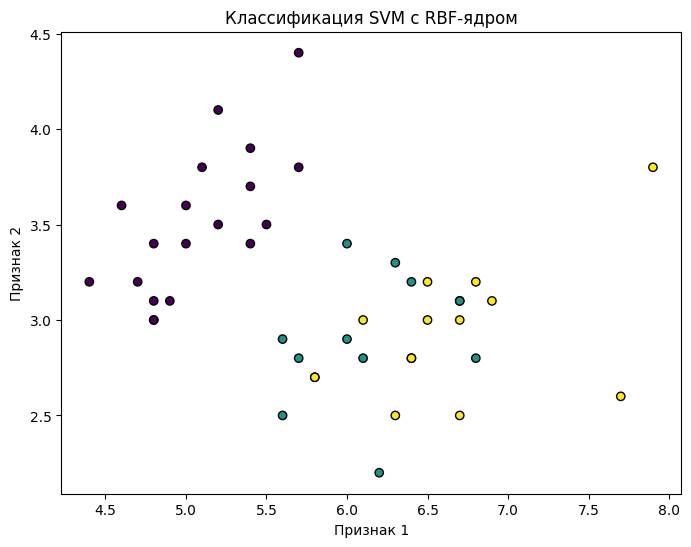

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных (например, датасет Ирис)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение параметров для поиска по сетке
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# Создание модели SVM
svm = SVC()

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train, y_train)

# Результаты поиска по сетке
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение кросс-валидации:", grid_search.best_score_)

# Оценка модели на тестовых данных
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Вывод результатов
print("Отчет о классификации:\n", classification_report(y_test, y_pred))
print("Матрица путаницы:\n", confusion_matrix(y_test, y_pred))

# Визуализация результатов (если требуется)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')
plt.title('Классификация SVM с RBF-ядром')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
